Скачивание датасета с kaggle.com (файл csv)

In [1]:
#Установка библиотеки Kaggle
!pip install kaggle

In [2]:
#Создание каталога с именем ".kaggle" в папке root (мы находимся в папке content, root находится на уровень выше)
!mkdir ~/.kaggle

In [3]:
#Копирование файла "kaggle.json" в созданный каталог (предварительно вручную файл "kaggle.json" загружен в папку content)
!cp kaggle.json ~/.kaggle/

In [4]:
#Назначение необходимого разрешения для файла (только владелец файла имеет полный доступ к чтению и записи этого файла)
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
#Скачивание датасета с kaggle
!kaggle datasets download rabieelkharoua/students-performance-dataset

Dataset URL: https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
students-performance-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
#Распаковка архива
!unzip students-performance-dataset.zip
#В итоге в папке content должны быть 2 файла: 'student-academic-stress-real-world-dataset.zip' и 'academic Stress level - maintainance 1.csv'

Archive:  students-performance-dataset.zip
replace Student_performance_data _.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Student_performance_data _.csv  


Загрузка данных из файла csv

In [7]:
import data_loading as dl

file_path = 'Student_performance_data _.csv'
df = dl.load_data(file_path)
df = df.drop('StudentID', axis = 1) #просто уникальный идентификатор студента, в предсказании не поможет

Файл Student_performance_data _.csv найден
Файл не пустой
Файл успешно загружен


Визуализации

In [8]:
import data_visualization as dv

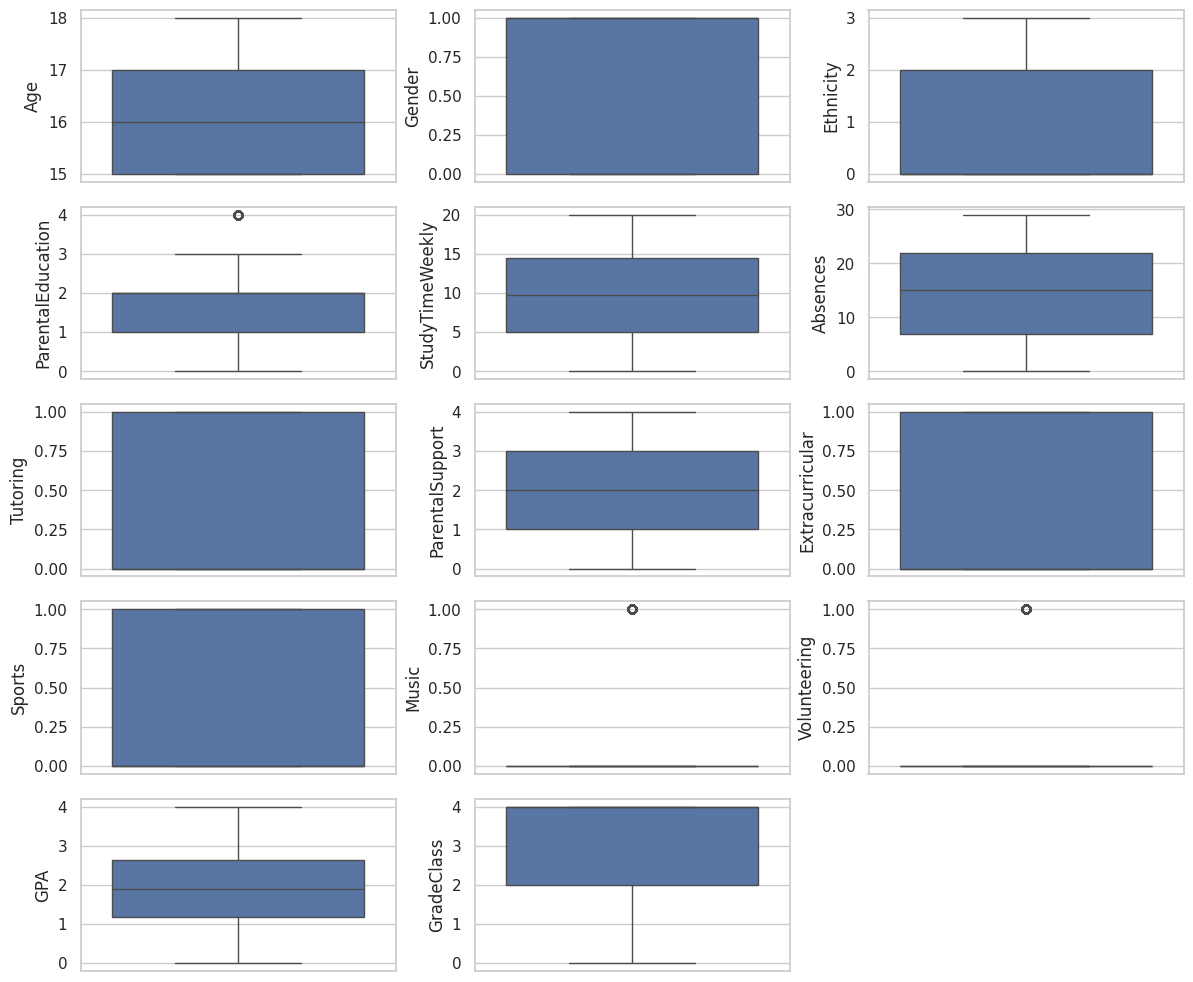

In [9]:
#Ящики с усами (на графиках видны выбросы в столбцах ParentalEducation, Music, Volunteering)
dv.boxplot_visualization(df)

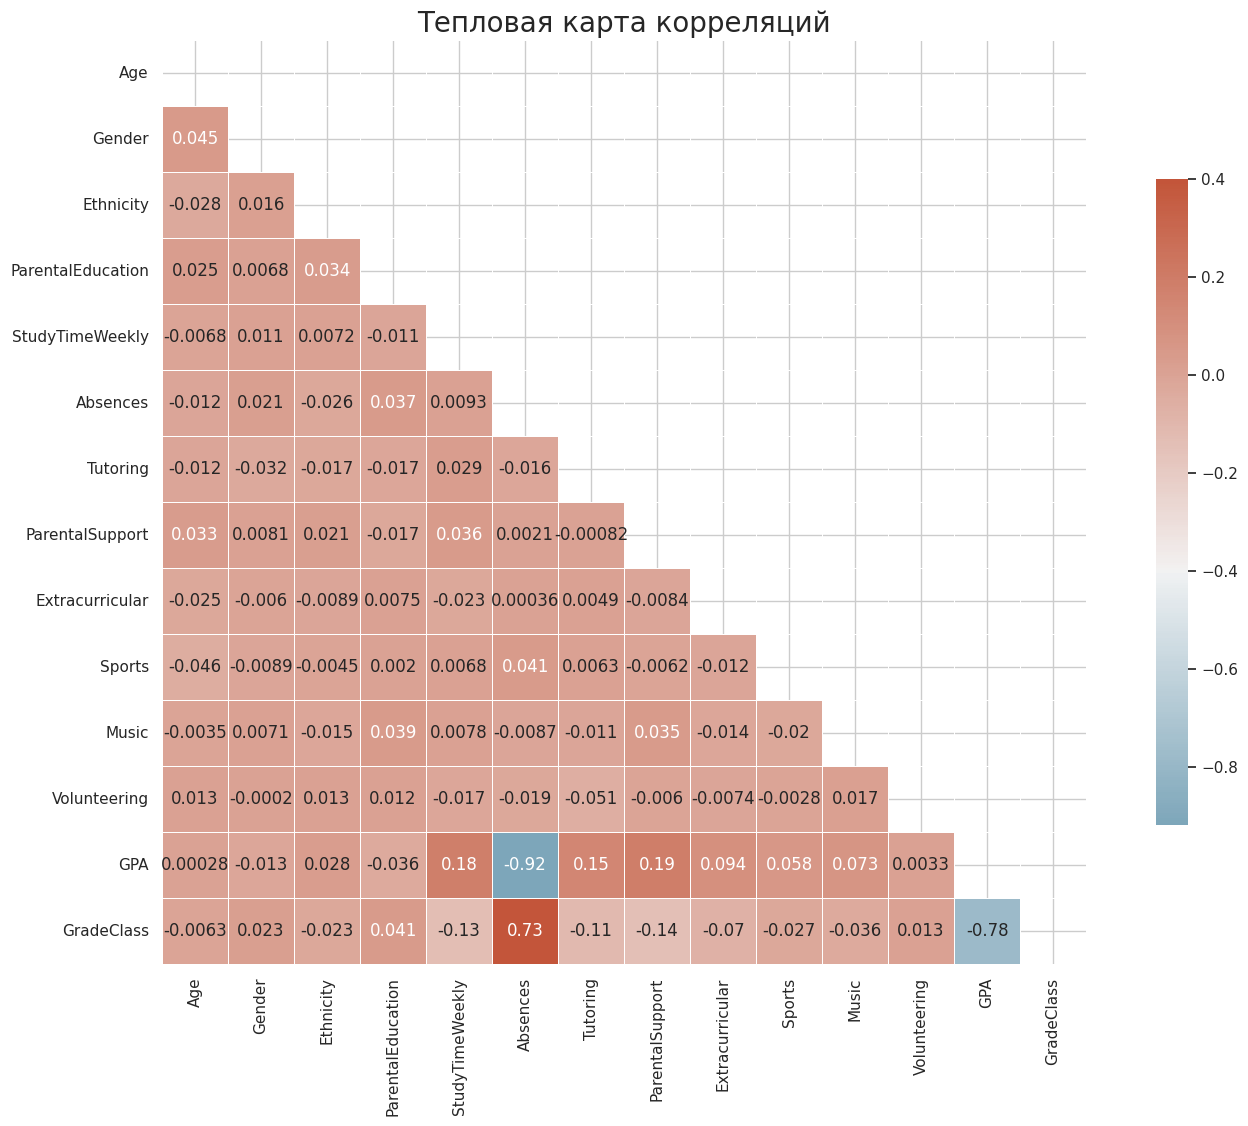

In [10]:
#Тепловая карта
dv.heatmap_visualization(df)

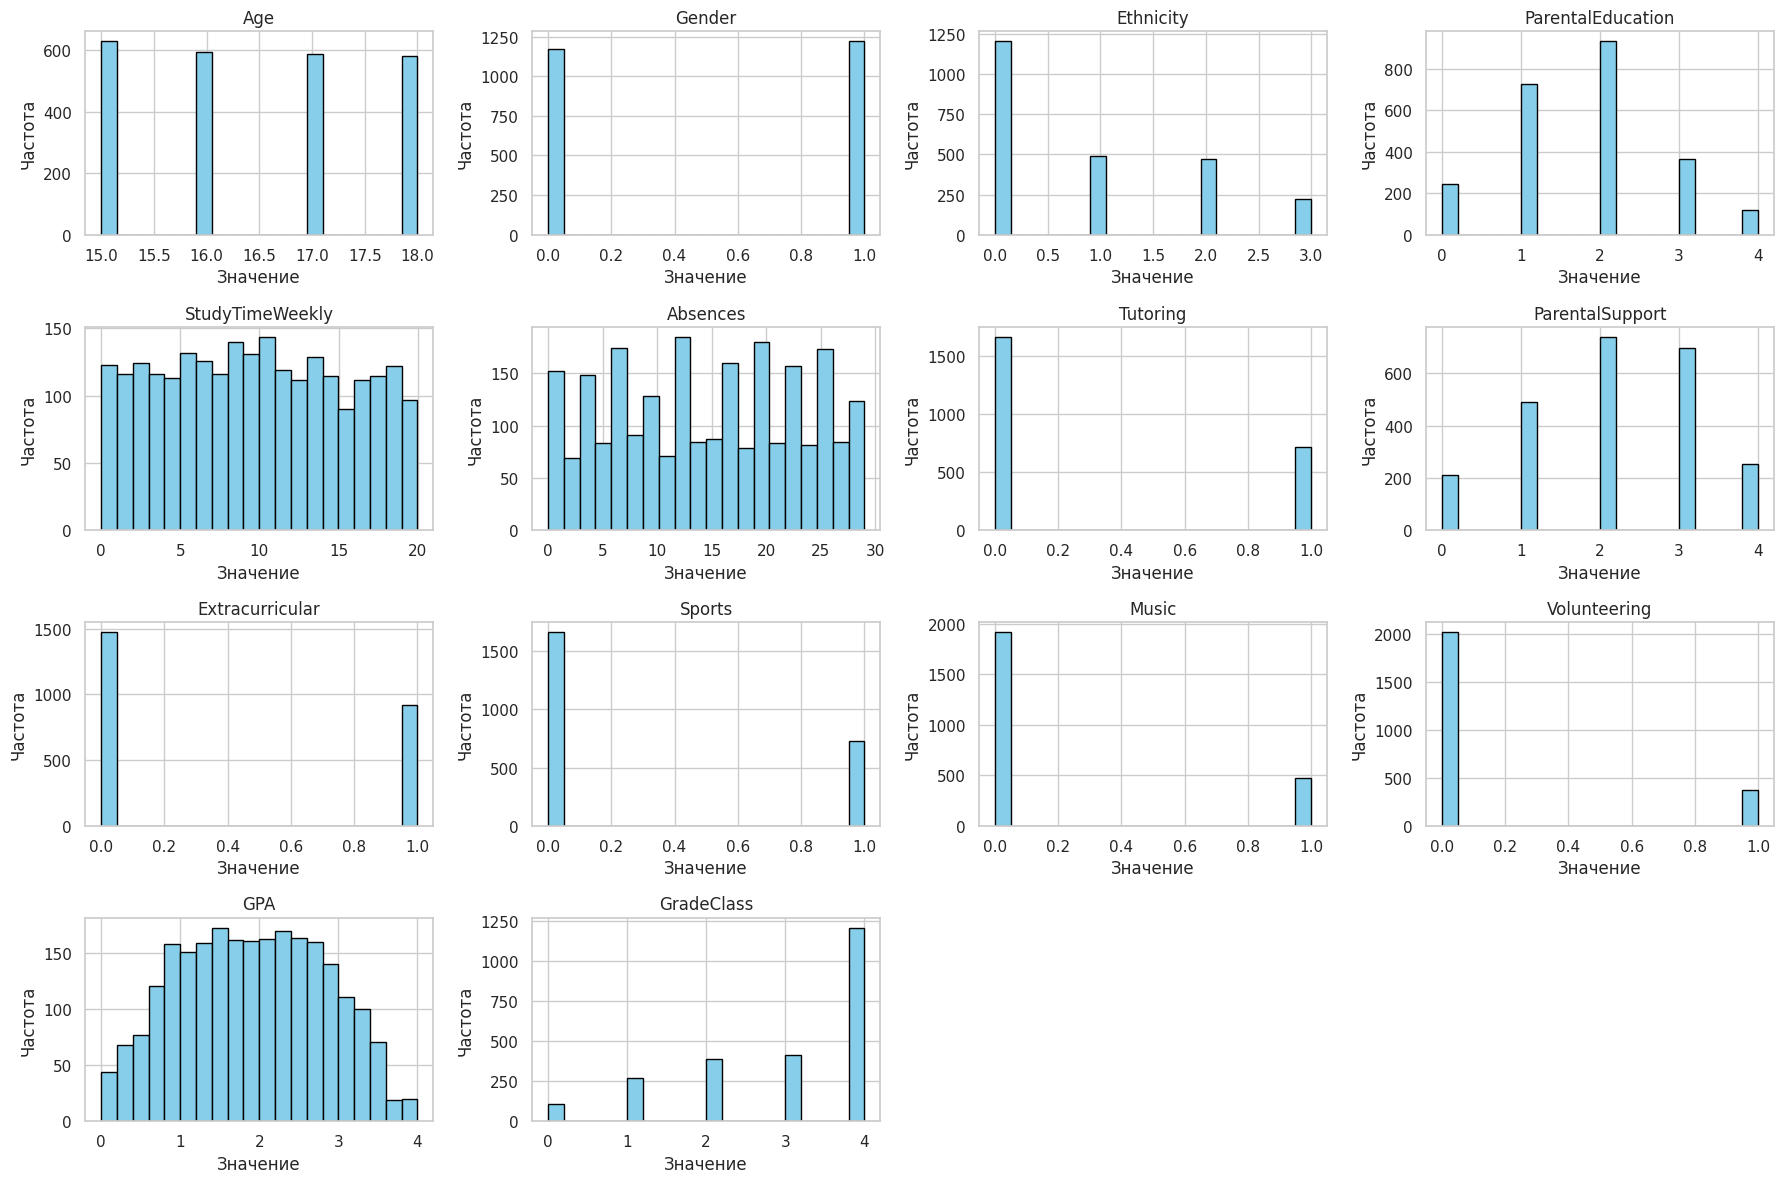

In [11]:
dv.hist_visualization(df)

Анализ пустых значений

In [12]:
import data_processing as dp

In [13]:
dp.analise_nulls(df) #Показывает количество столбцов с пустыми значениями
dp.show_nulls(df) #Показывает количесто пустых значений для каждого столбца
df = dp.fill_nulls(df) #Заполняет пустые значения наиболее часто встречающимися значениями

Пропущенные значения отсутствуют
Пропущенные значения отсутствуют
Пропущенные значения отсутствуют, заполнение не выполнено


Предобработка данных

In [14]:
numeric_features = ['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'StudyTimeWeekly', 'Absences',
                    'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA']
categorical_features = []
target_column = 'GradeClass'
X, y, preprocessor = dp.preprocess_data(df, numeric_features, categorical_features, target_column)

Тестирование работы логистической регрессии и случайного леса

In [15]:
import test_logistic_forest as tlf

tlf.test(X, y)
#Тут мы должны понять, что Предсказания случайного леса лучше, чем Предсказания логистической регрессии
#Я думаю, что это из-за наличия выбросов, которые видно на ящиках с усами

#Все значения чем ближе к 1, тем лучше, но 1 не всегда хорошо
#Precision (точность): показывает долю правильно отнесенных к данному классу объектов, если модель его туда отнесла (в моем случае довольно неплохие показатели для каждого класса)
#Recall (полнота, чувствительность): показывает долю правильно предсказанных объектов из всех объектов этого класса (тут очень плохо модель отработала на классе 0. Много объектов, фактически принадлежащих к классу 0, модель отнесла к другому)
#F1-score (F-мера): как гармонирует точность и полнота (F-мера будет где-то между точностью и полнотой)
#Support (поддержка): сколько фактически объектов принадлежало к каждому классу в тестовой выборке (вот тут видно, что объектов класса 0 очень мало, а класса 4 очень много, что не хорошо. Скорее всего нужна будет стратификация)

Точность логистической регрессии (Logistic Regression):  0.8314763231197771
Точность случайного леса (Random Forest):  0.9178272980501393

Отчет по классификации случайного леса (Random Forest):
               precision    recall  f1-score   support

         0.0       0.81      0.35      0.49        37
         1.0       0.84      0.86      0.85        71
         2.0       0.95      0.93      0.94       122
         3.0       0.90      0.91      0.90       118
         4.0       0.93      0.98      0.96       370

    accuracy                           0.92       718
   macro avg       0.89      0.81      0.83       718
weighted avg       0.91      0.92      0.91       718



Обучение модели

In [16]:
import train_model as tm

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25, stratify=y)

# Обучение модели
model = tm.train(X_train, y_train)

# Предсказание на тестовых данных
y_pred = tm.predict(model, X_test)

# Оценка модели
mse, r2 = tm.evaluate(y_test, y_pred)
print(f"Среднеквадратичная ошибка: {mse:.2f}")
print(f"Коэффициент детерминации R^2: {r2:.2f}")

Среднеквадратичная ошибка: 0.30
Коэффициент детерминации R^2: 0.80


Визуализация фактических и предсказанных значений

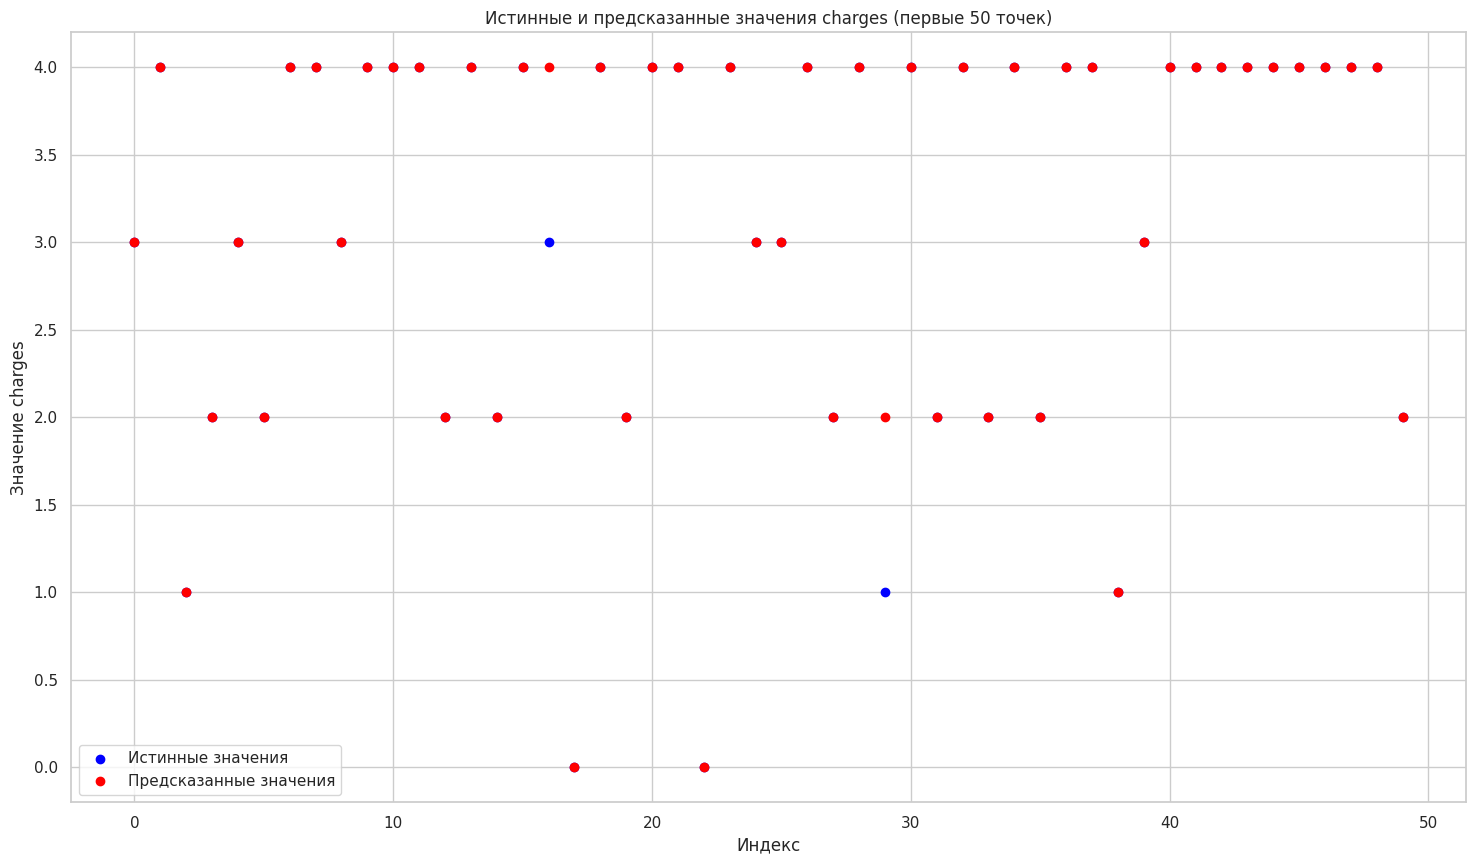

In [18]:
tm.plot_predictions(y_test, y_pred)